<a href="https://colab.research.google.com/github/Puneet289/practicesets/blob/master/elections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
df=pd.read_csv('/content/drive/My Drive/Datasets/LS_2.0.csv')

In [0]:
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
STATE                                       2263 non-null object
CONSTITUENCY                                2263 non-null object
NAME                                        2263 non-null object
WINNER                                      2263 non-null int64
PARTY                                       2263 non-null object
SYMBOL                                      2018 non-null object
GENDER                                      2018 non-null object
CRIMINAL
CASES                              2018 non-null object
AGE                                         2018 non-null float64
CATEGORY                                    2018 non-null object
EDUCATION                                   2018 non-null object
ASSETS                                      2018 non-null object
LIABILITIES                                 2018 non-null object
GENERAL
VOTES                               2263

In [0]:
df['NAME'][4]

'Satyapal Singh Baghel'

In [0]:
df.tail()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
2258,Maharashtra,YAVATMAL-WASHIM,Anil Jayram Rathod,0,IND,SHIP,MALE,0,43.0,GENERAL,Post Graduate,"Rs 48,90,000\n ~ 48 Lacs+","Rs 10,20,000\n ~ 10 Lacs+",14661,25,14686,0.766419,1.250060,1916185
2259,Telangana,ZAHIRABAD,B.B.PATIL,1,TRS,Car,MALE,18,63.0,GENERAL,Graduate,"Rs 1,28,78,51,556\n ~ 128 Crore+","Rs 1,15,35,000\n ~ 1 Crore+",434066,178,434244,28.975369,41.574183,1498666
2260,Telangana,ZAHIRABAD,MADAN MOHAN RAO,0,INC,Hand,MALE,0,49.0,GENERAL,Post Graduate,"Rs 90,36,63,001\n ~ 90 Crore+",Rs 0\n ~,427900,115,428015,28.559732,40.977823,1498666
2261,Telangana,ZAHIRABAD,BANALA LAXMA REDDY,0,BJP,Lotus,MALE,3,47.0,GENERAL,12th Pass,"Rs 5,85,77,327\n ~ 5 Crore+","Rs 52,50,000\n ~ 52 Lacs+",138731,216,138947,9.271379,13.302678,1498666
2262,Telangana,ZAHIRABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11138,2,11140,0.743328,1.066535,1498666


In [0]:
count=0
for i in range (0,2262):
  count+=df['GENERAL\nVOTES'][i]
avg=count/2263
avg

261594.16129032258

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
STATE                                       2263 non-null object
CONSTITUENCY                                2263 non-null object
NAME                                        2263 non-null object
WINNER                                      2263 non-null int64
PARTY                                       2263 non-null object
SYMBOL                                      2018 non-null object
GENDER                                      2018 non-null object
CRIMINAL
CASES                              2018 non-null object
AGE                                         2018 non-null float64
CATEGORY                                    2018 non-null object
EDUCATION                                   2018 non-null object
ASSETS                                      2018 non-null object
LIABILITIES                                 2018 non-null object
GENERAL
VOTES                               2263

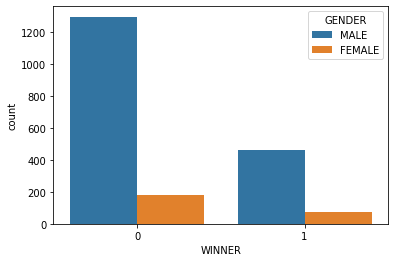

In [0]:
sns.countplot(x='WINNER',data=df,hue='GENDER')

In [0]:
var=np.chararray(2263)
for i in range(2262):
  if df['GENERAL\nVOTES'][i]>261594:
    var[i]='a'
  elif df['GENERAL\nVOTES'][i]<=261594:
    var[i]='b'

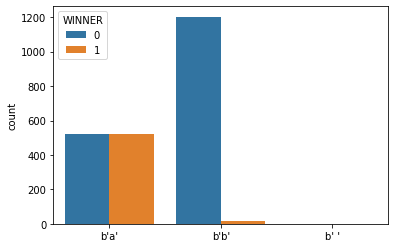

In [0]:
sns.countplot(x=var,data=df,hue='WINNER')

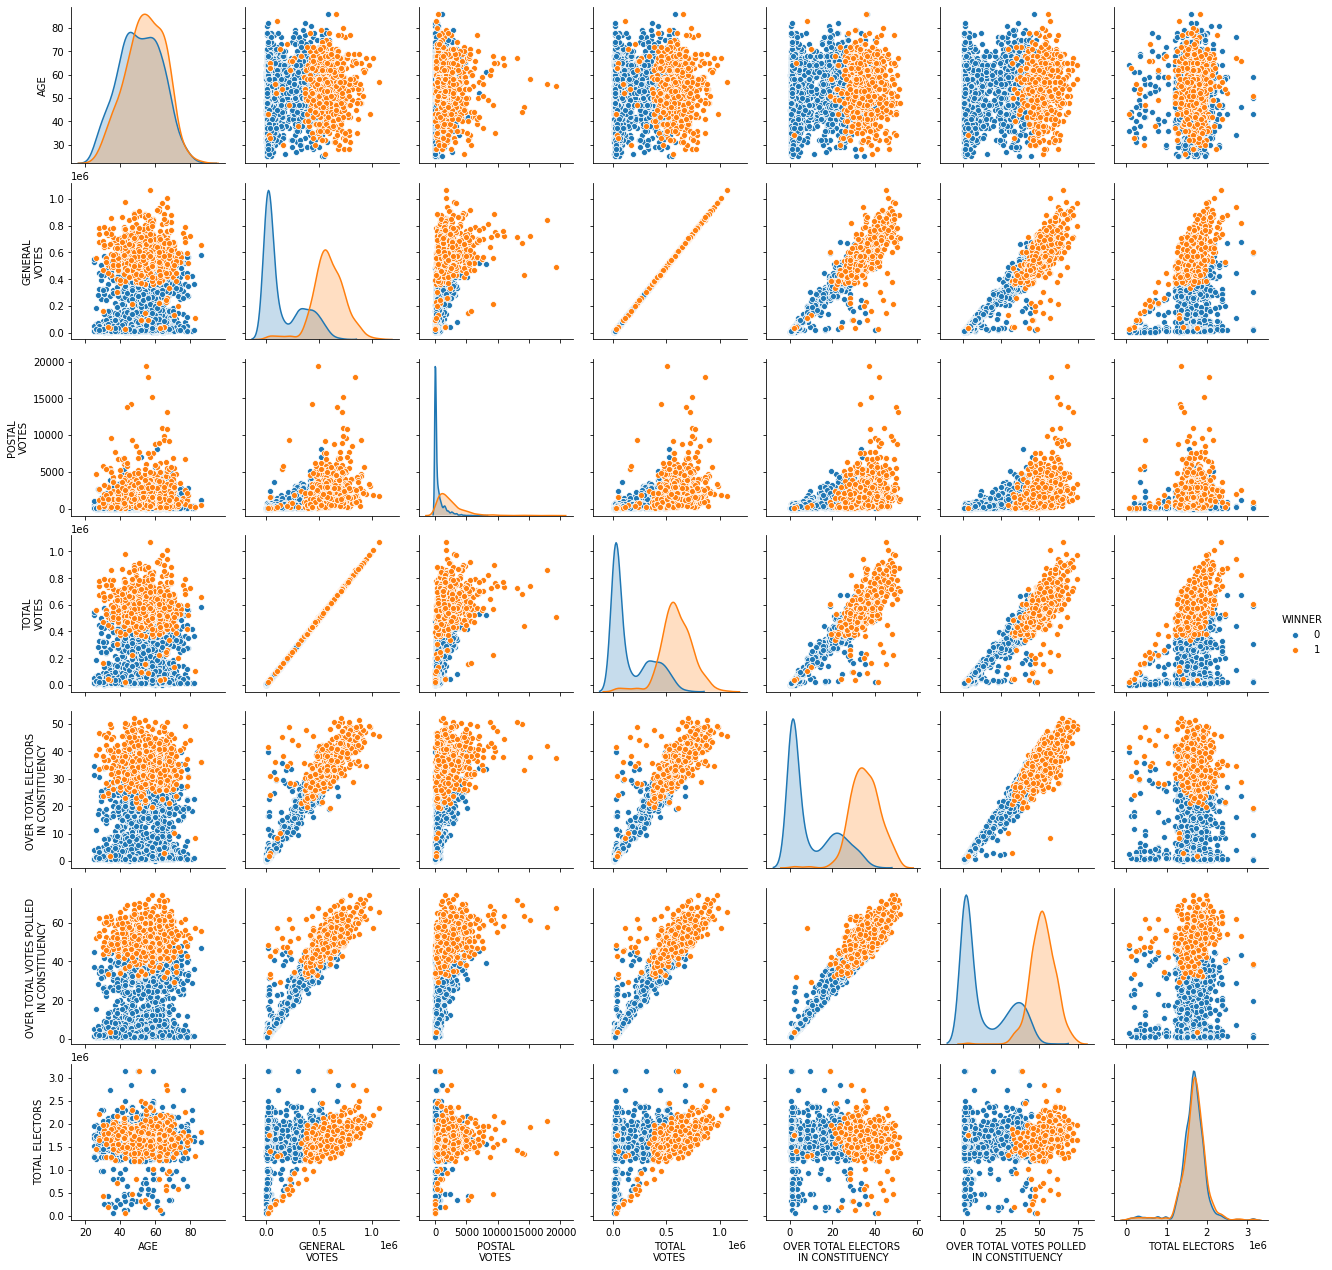

In [0]:
sns.pairplot(df,hue='WINNER')

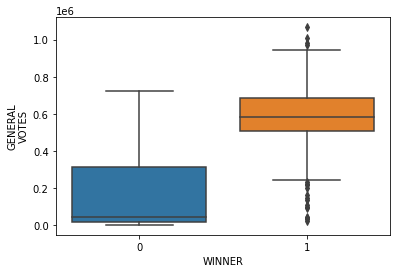

In [0]:
sns.boxplot(x='WINNER',y='GENERAL\nVOTES',data=df)

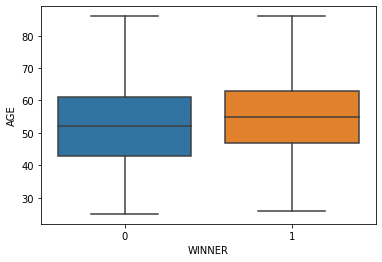

In [0]:
sns.boxplot(x='WINNER',y='AGE',data=df)

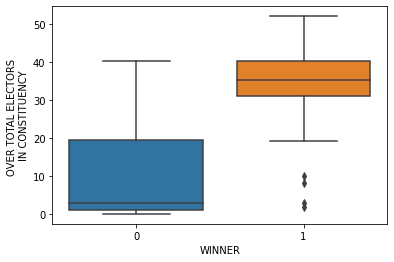

In [0]:
sns.boxplot(x='WINNER',y='OVER TOTAL ELECTORS \nIN CONSTITUENCY',data=df)

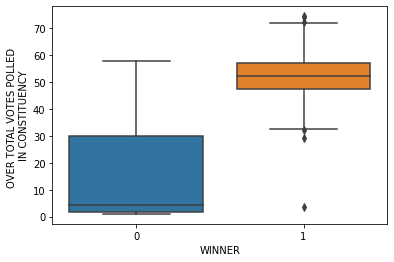

In [0]:
sns.boxplot(x='WINNER',y='OVER TOTAL VOTES POLLED \nIN CONSTITUENCY',data=df)

In [0]:
df.columns

Index(['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'SYMBOL', 'GENDER',
       'CRIMINAL\nCASES', 'AGE', 'CATEGORY', 'EDUCATION', 'ASSETS',
       'LIABILITIES', 'GENERAL\nVOTES', 'POSTAL\nVOTES', 'TOTAL\nVOTES',
       'OVER TOTAL ELECTORS \nIN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY', 'TOTAL ELECTORS'],
      dtype='object')

In [0]:
X=df[[ 'ASSETS','LIABILITIES','AGE', 'GENERAL\nVOTES', 'POSTAL\nVOTES', 'TOTAL\nVOTES','OVER TOTAL ELECTORS \nIN CONSTITUENCY','OVER TOTAL VOTES POLLED \nIN CONSTITUENCY','MALE']]

In [0]:
y=df['WINNER']

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,VotingClassifier,RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [0]:
df.corr()

,WINNER,AGE,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
WINNER,1.000000,0.110294,0.725678,0.520286,0.726125,0.738976,0.757303,0.038107
AGE,0.110294,1.000000,0.208567,0.129360,0.208600,0.207304,0.223700,0.021083
GENERAL\nVOTES,0.725678,0.208567,1.000000,0.616742,0.999988,0.962219,0.962905,0.211092
POSTAL\nVOTES,0.520286,0.129360,0.616742,1.000000,0.620614,0.630882,0.634896,0.038453
TOTAL\nVOTES,0.726125,0.208600,0.999988,0.620614,1.000000,0.962441,0.963150,0.210515
OVER TOTAL ELECTORS \nIN CONSTITUENCY,0.738976,0.207304,0.962219,0.630882,0.962441,1.000000,0.977416,0.009227
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,0.757303,0.223700,0.962905,0.634896,0.963150,0.977416,1.000000,0.072228
TOTAL ELECTORS,0.038107,0.021083,0.211092,0.038453,0.210515,0.009227,0.072228,1.000000


In [0]:
gender=pd.get_dummies(df['GENDER'],drop_first=True)

In [0]:
category=pd.get_dummies(df['CATEGORY'],drop_first=True)

In [0]:
df=pd.concat([df,gender,category],axis=1)

In [0]:
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS,MALE,SC,ST
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790,1,0,1
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790,1,0,1
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790,1,0,1
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790,0,0,0
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690,1,1,0


In [0]:
df=df.drop(['CATEGORY','GENDER'],axis=1)

In [0]:
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,CRIMINAL\nCASES,AGE,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS,MALE,SC,ST
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,52,52.0,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790,1,0,1
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,0,54.0,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790,1,0,1
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,3,52.0,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790,1,0,1
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790,0,0,0
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,5,58.0,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690,1,1,0


In [0]:
df.corr()

,WINNER,AGE,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS,MALE,SC,ST
WINNER,1.000000,0.110294,0.725678,0.520286,0.726125,0.738976,0.757303,0.038107,0.109294,-0.017216,-0.009642
AGE,0.110294,1.000000,0.208567,0.129360,0.208600,0.207304,0.223700,0.021083,0.168025,-0.021061,-0.079359
GENERAL\nVOTES,0.725678,0.208567,1.000000,0.616742,0.999988,0.962219,0.962905,0.211092,0.195540,-0.014222,-0.037703
POSTAL\nVOTES,0.520286,0.129360,0.616742,1.000000,0.620614,0.630882,0.634896,0.038453,0.149507,-0.017905,-0.024317
TOTAL\nVOTES,0.726125,0.208600,0.999988,0.620614,1.000000,0.962441,0.963150,0.210515,0.195719,-0.014279,-0.037710
OVER TOTAL ELECTORS \nIN CONSTITUENCY,0.738976,0.207304,0.962219,0.630882,0.962441,1.000000,0.977416,0.009227,0.203820,-0.022868,0.016099
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,0.757303,0.223700,0.962905,0.634896,0.963150,0.977416,1.000000,0.072228,0.210437,-0.022882,-0.013650
TOTAL ELECTORS,0.038107,0.021083,0.211092,0.038453,0.210515,0.009227,0.072228,1.000000,0.008963,0.063125,-0.268406
MALE,0.109294,0.168025,0.195540,0.149507,0.195719,0.203820,0.210437,0.008963,1.000000,0.108077,0.061834
SC,-0.017216,-0.021061,-0.014222,-0.017905,-0.014279,-0.022868,-0.022882,0.063125,0.108077,1.000000,-0.156548


In [0]:
dtree=DecisionTreeClassifier()

In [0]:
rfc=RandomForestClassifier(n_estimators=10)

In [0]:
bgc=BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=10)

In [0]:
log=LogisticRegression()

In [0]:
evc=VotingClassifier(estimators=[('log',log),('dtree',dtree),('svc',svc)],voting='hard')

In [0]:
svc=SVC()

In [0]:
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
df=df.dropna(axis=0)

In [0]:
df=df.reset_index(drop=True)

In [0]:
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,CRIMINAL\nCASES,AGE,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS,MALE,SC,ST
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,52,52.0,12th Pass,3000000.0,200000.0,376892,482,377374,25.330684,35.468248,1489790,1,0,1
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,0,54.0,Post Graduate,10000000.0,800000.0,318665,149,318814,21.399929,29.964370,1489790,1,0,1
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,3,52.0,12th Pass,30000000.0,10000000.0,314057,181,314238,21.092771,29.534285,1489790,1,0,1
3,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,5,58.0,Doctorate,70000000.0,8600000.0,644459,2416,646875,33.383823,56.464615,1937690,1,1,0
4,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,0,47.0,Post Graduate,130000000.0,20000000.0,434199,1130,435329,22.466390,37.999125,1937690,1,1,0


In [0]:
predictions=log.predict(X_test)

In [0]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.19      0.31       272
           1       0.35      0.89      0.51       136

    accuracy                           0.42       408
   macro avg       0.57      0.54      0.41       408
weighted avg       0.64      0.42      0.37       408



In [0]:
print(confusion_matrix(y_test,predictions))

[[ 52 220]
 [ 15 121]]


In [0]:
adb=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=10,learning_rate=1)

In [0]:
adb.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [0]:
predictions=adb.predict(X_test)

In [0]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       272
           1       0.92      0.88      0.90       136

    accuracy                           0.93       408
   macro avg       0.93      0.92      0.92       408
weighted avg       0.93      0.93      0.93       408



In [0]:
print(confusion_matrix(y_test,predictions))

[[261  11]
 [ 16 120]]


In [0]:
bgc.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [0]:
predictions=bgc.predict(X_test)

In [0]:
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       272
           1       0.90      0.88      0.89       136

    accuracy                           0.93       408
   macro avg       0.92      0.92      0.92       408
weighted avg       0.93      0.93      0.93       408



[[259  13]
 [ 16 120]]


In [0]:
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.9264705882352942

In [0]:
predictions=rfc.predict(X_test)

In [0]:
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       272
           1       0.89      0.89      0.89       136

    accuracy                           0.93       408
   macro avg       0.92      0.92      0.92       408
weighted avg       0.93      0.93      0.93       408



[[257  15]
 [ 15 121]]


In [0]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
predictions=dtree.predict(X_test)

In [0]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       272
           1       0.89      0.89      0.89       136

    accuracy                           0.93       408
   macro avg       0.92      0.92      0.92       408
weighted avg       0.93      0.93      0.93       408



In [0]:
print(confusion_matrix(y_test,predictions))

[[257  15]
 [ 15 121]]


In [0]:
dtree.score(X_train,y_train)

1.0

In [0]:
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
svc.score(X_train,y_train)

0.711882229232387

In [0]:
predictions=svc.predict(X_test)

In [0]:
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80       272
           1       0.75      0.02      0.04       136

    accuracy                           0.67       408
   macro avg       0.71      0.51      0.42       408
weighted avg       0.70      0.67      0.55       408



[[271   1]
 [133   3]]


In [0]:
evc.fit(X_train,y_train)

VotingClassifier(estimators=[('log',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('dtree',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gi...
                                        

In [0]:
evc.score(X_train,y_train)

0.9789695057833859

In [0]:
predictions=evc.predict(X_test)

In [0]:
def string_to_integer(asset):
    try:
        _,ass = asset.split('~')
        ass = ass.replace(' ','')
        if 'Lacs+' in ass:
            ass = ass.replace('Lacs+', '00000')
        elif 'Crore+' in ass:
            ass = ass.replace('Crore+', '0000000')
        elif 'Thou+' in ass:
            ass = ass.replace('Thou+', '000')
        elif 'Hund+' in ass:
            ass = ass.replace('Hund+', '00')
        ass = int(ass)
        return ass
    except:
        return None

In [0]:
df['LIABILITIES']=df['LIABILITIES'].apply(string_to_integer)

In [0]:
print(df['LIABILITIES'][7])

30000000.0


In [0]:
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,CRIMINAL\nCASES,AGE,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS,MALE,SC,ST
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,52,52.0,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+",200000.0,376892,482,377374,25.330684,35.468248,1489790,1,0,1
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,0,54.0,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+",800000.0,318665,149,318814,21.399929,29.964370,1489790,1,0,1
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,3,52.0,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+",10000000.0,314057,181,314238,21.092771,29.534285,1489790,1,0,1
3,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,5,58.0,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+",8600000.0,644459,2416,646875,33.383823,56.464615,1937690,1,1,0
4,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,0,47.0,Post Graduate,"Rs 13,37,84,385\n ~ 13 Crore+",20000000.0,434199,1130,435329,22.466390,37.999125,1937690,1,1,0


In [0]:
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,CRIMINAL\nCASES,AGE,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS,MALE,SC,ST
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,52,52.0,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+",200000.0,376892,482,377374,25.330684,35.468248,1489790,1,0,1
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,0,54.0,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+",800000.0,318665,149,318814,21.399929,29.964370,1489790,1,0,1
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,3,52.0,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+",10000000.0,314057,181,314238,21.092771,29.534285,1489790,1,0,1
3,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,5,58.0,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+",8600000.0,644459,2416,646875,33.383823,56.464615,1937690,1,1,0
4,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,0,47.0,Post Graduate,"Rs 13,37,84,385\n ~ 13 Crore+",20000000.0,434199,1130,435329,22.466390,37.999125,1937690,1,1,0


In [0]:
df['ASSETS']=df['ASSETS'].apply(string_to_integer)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018 entries, 0 to 2017
Data columns (total 20 columns):
STATE                                       2018 non-null object
CONSTITUENCY                                2018 non-null object
NAME                                        2018 non-null object
WINNER                                      2018 non-null int64
PARTY                                       2018 non-null object
SYMBOL                                      2018 non-null object
CRIMINAL
CASES                              2018 non-null object
AGE                                         2018 non-null float64
EDUCATION                                   2018 non-null object
ASSETS                                      1991 non-null float64
LIABILITIES                                 1361 non-null float64
GENERAL
VOTES                               2018 non-null int64
POSTAL
VOTES                                2018 non-null int64
TOTAL
VOTES                                 2018

In [0]:
df['ASSETS'][3]

70000000.0

In [0]:
count=0
for i in range(2017):
  if df['LIABILITIES'][i] is not None:
    count+=1
count

2017

In [0]:
print(classification_report(y_test,predictions),"\n",confusion_matrix(y_test,predictions))


              precision    recall  f1-score   support

           0       0.91      0.96      0.94       272
           1       0.92      0.81      0.86       136

    accuracy                           0.91       408
   macro avg       0.91      0.89      0.90       408
weighted avg       0.91      0.91      0.91       408
 
 [[262  10]
 [ 26 110]]
